<b> 1. Simple Regression </b>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

STEP 1: Create Data

In [8]:
def generate_data(n=100):
    np.random.seed(42)
    x = np.linspace(0, 10, n)
    noise = np.random.normal(0, 1.0, size=n)
    y = 2.5 * x + 3 + noise
    return x, y

STEP 2: Define the Model

In [29]:
def predict(x, w, b):
    return float(w * x + b)

STEP 3: Define the MSE Loss

In [30]:
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

STEP 4: Training

In [31]:
def train(x, y, lr=0.01, epochs=500):
    w, b = 0.0, 0.0
    mse_vs_epoch = []

    for epoch in range(epochs):
        y_pred = w * x + b
        
        dw = (2 / len(x)) * ((y_pred - y) * x).sum()
        db = (2 / len(x)) * (y_pred - y).sum()
        
        w -= lr * dw
        b -= lr * db

        loss = mse(y, y_pred)
        mse_vs_epoch.append(loss)

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.3f}, b={b:.3f}")

    return w, b, mse_vs_epoch

STEP 5: Plotting

In [32]:
# Scatter Plot of model

def plot_results(x, y, w, b):
    plt.scatter(x, y, label="Data")
    plt.plot(x, w * x + b, color='red', label="Model")
    plt.legend()
    plt.show()


In [33]:
# MSE vs Epoch loss

def plot_mse(mse_vs_epoch):
    plt.plot(mse_vs_epoch, color='blue', label="MSE vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

STEP 6: Main Code

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

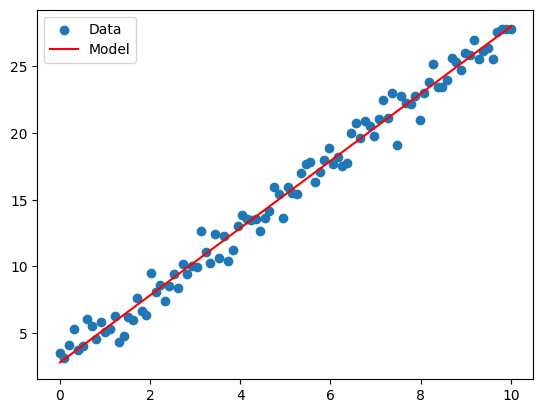

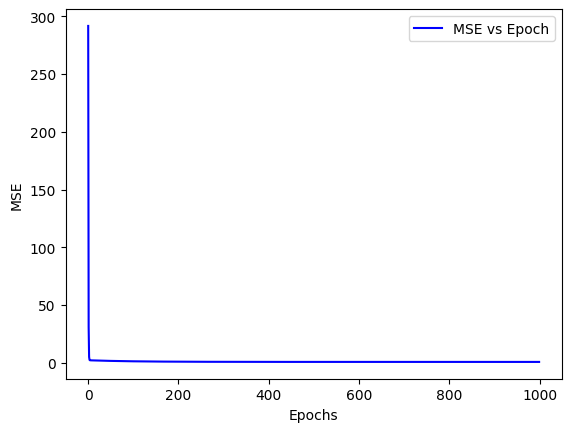

In [37]:
x,y = generate_data()

print(x)
print(y)

w, b, mse_vs_epoch = train(x,y,epochs=1000)

plot_results(x,y,w,b)

plot_mse(mse_vs_epoch)

STEP 7: random value testing

[8.855112819280354, 6.893001955979258, 7.298220847277232, 3.5852974292166633, 2.5350440553332314, 5.9502201871523335, 3.375371019986908, 2.040114448144641, 8.035753264650037, 3.029346570476584, 2.0666091283035204, 7.893081064167376, 3.4794923201505092, 1.2611147991274163, 6.862143221092861, 3.4050495617145455, 7.757267729286665, 5.285333572265815, 8.037216545888981, 1.9849118526429765, 5.6427347249795226, 6.516294830137332, 7.852840407566256, 7.677461353738634, 2.198628742763615, 7.967603518052588, 6.035349686281732, 6.504746143213016, 4.824433274380633, 1.0230489492518846, 8.703409972602557, 2.0895786620654575, 6.1458062878501565, 8.845352676780603, 7.755233865053016, 2.1602618661140736, 2.4884906351002405, 7.63281103298409, 6.386768283255791, 9.159406285895846, 1.5759885867282617, 6.903799810461265, 9.006509113788212, 8.590919692347999, 4.056558673933756, 8.772644257119282, 6.32167027607286, 9.809998249492017, 4.728170545142829, 6.271503679922452, 5.61325989849094, 1.2476633782033908

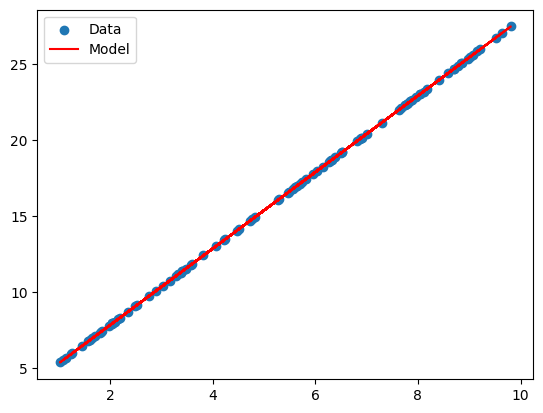

In [43]:
import random
x_test = []
y_test = []

for i in range(100):
    x = random.uniform(1, 10)
    x_test.append(x)
    y = predict(x, w, b)
    y_test.append(y)

print(x_test)
print(y_test)

plot_results(np.array(x_test), np.array(y_test), w, b)